# how to change the type of a col using pandas


In [1]:
#for this example we will be using pandas to read and change our data 
#and we will be using matplotlib ans seaborn to visualize our data
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#our first step is to read our object in to pandas
df = pd.read_csv(r'data\Apple 2009-2024.csv')

#lets check if the data looks right to us 
df.head

,year,EBITDA (millions),Revenue (millions),Gross Profit (millions),Op Income (millions),Net Income (millions),EPS,Shares Outstanding,Year Close Price,Total Assets (millions),Cash on Hand (millions),Long Term Debt (millions),Total Liabilities (millions),Gross Margin,PE ratio,Employees
0,2024,"$134,661","$391,035","$180,683","$123,216","$93,736",$6.08,"15,408",243.0400,"$364,980","$65,171","$85,750","$308,030",46.21%,39.97,"164,000"
1,2023,"$125,820","$383,285","$169,148","$114,301","$96,995",$6.13,"15,813",191.5919,"$352,583","$61,555","$95,281","$290,437",45.03%,29.84,"161,000"
2,2022,"$130,541","$394,328","$170,782","$119,437","$99,803",$6.11,"16,326",128.5816,"$352,755","$48,304","$98,959","$302,083",43.06%,21.83,"164,000"
3,2021,"$120,233","$365,817","$152,836","$108,949","$94,680",$5.61,"16,865",174.7132,"$351,002","$62,639","$109,106","$287,912",43.02%,28.93,"154,000"
4,2020,"$77,344","$274,515","$104,956","$66,288","$57,411",$3.28,"17,528",129.7556,"$323,888","$90,943","$98,667","$258,549",38.78%,35.14,"147,000"


In [3]:
# the data looks right to us so lets do some exploring of this data
# lets print our a col of this data
df['Revenue (millions)']

0     $391,035
1     $383,285
2     $394,328
3     $365,817
4     $274,515
5     $260,174
6     $265,595
7     $229,234
8     $215,639
9     $233,715
10    $182,795
11    $170,910
12    $156,508
13    $108,249
14     $65,225
15     $42,905
Name: Revenue (millions), dtype: object

In [4]:
#thats strange the revenue is type object lets see if we can find a max value
df['Revenue (millions)'].max()

'$65,225'

In [5]:
#it says our max is 65,225 which is not correct so it looks like these values arent being read in as ints
# we can make simple change to clean the data 

#im going to make a new varable to hold the df in so the orignal df does not get changed
clean_df = df

# in this line of code we are using the replace function to get rid of the $ and the , from the col
# we are doing this because if we change our col to an int we wont be able to reconize "numbers"
# with a $ or a , in them 
# we need to set "regex" or regular expression to true in this case because the $ sign can be interperted
# as a command in python so we need to include the \ before the $ to idicate that we are using the $
clean_df['Revenue (millions)'] = clean_df['Revenue (millions)'].replace({'\$':'',',':''},regex = True)

#lets see what our col looks like now 
clean_df['Revenue (millions)']

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
C:\Users\eyas1\AppData\Local\Temp\ipykernel_11340\1419137473.py:12: SyntaxWarning: invalid escape sequence '\$'
  clean_df['Revenue (millions)'] = clean_df['Revenue (millions)'].replace({'\$':'',',':''},regex = True)


0     391035
1     383285
2     394328
3     365817
4     274515
5     260174
6     265595
7     229234
8     215639
9     233715
10    182795
11    170910
12    156508
13    108249
14     65225
15     42905
Name: Revenue (millions), dtype: object

In [6]:
#now that we have elimated the $ we still have to change the type of this data to an int 
clean_df['Revenue (millions)'] = clean_df['Revenue (millions)'].astype(int) 

clean_df['Revenue (millions)']

0     391035
1     383285
2     394328
3     365817
4     274515
5     260174
6     265595
7     229234
8     215639
9     233715
10    182795
11    170910
12    156508
13    108249
14     65225
15     42905
Name: Revenue (millions), dtype: int64

<Axes: xlabel='year', ylabel='Revenue (millions)'>

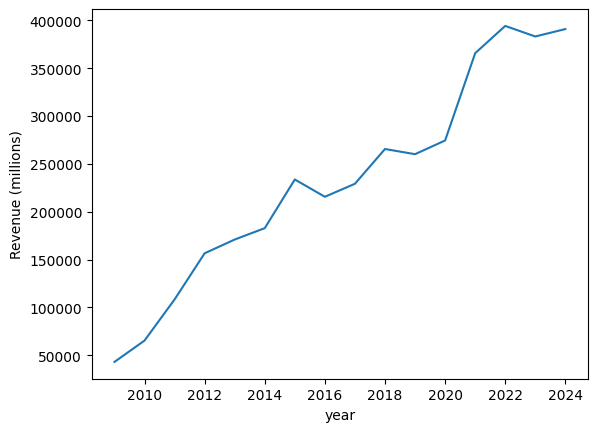

In [7]:
# now the type displays as an int lets plot this data
sns.lineplot(data = clean_df,
x = clean_df['year'],
y = clean_df['Revenue (millions)']

)
#epic